In [1]:
import numpy as np
import gzip
import os
import csv
import types

import matplotlib.pyplot as plt

from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras import optimizers

Using TensorFlow backend.
/Users/jingjingfeng/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# this function reads the directory that have picture data and label according to the directory name to identify name of the person for Olivetti facedata

In [6]:
def read_files_data_and_labels(input_dir):
    # We first assgin some empty arrays as holders
    # The 300/100 is the total number of pics for train and test, respectively. 10304 is the total pixels of each image. 40 is the size of the label
    data_train = np.empty([300, 10304])
    data_test = np.empty([100, 10304])
    label_train = np.zeros([300, 40])
    label_test = np.zeros([100, 40])

    # index in train and test group
    train_index = 0
    test_index = 0

    # Now we read the name of all the folders, each folder's name is the label for the images inside the folder. Note that dirs=folder here
    # We have total 40 folders, i.e. 40 people or say 40 names
    dirs = os.listdir(input_dir)
    print("We have following people")
    print(dirs)
    print("\n")

    # Now we enter each folder, read the images inside the folder. Each folder contains 10 images.
    # We use a for loop to read folder one by one.
    for label in dirs:
#         print("Now we start to read the images of " + label )
        dir_name = input_dir + "/" + label
        dir_files = os.listdir(dir_name)

        if os.path.isdir(dir_name):
        # Now we enter the first folder s1, and use a second for loop to read each image one by one
            for file_name in dir_files:
#                 print("now read " + label+ "-" + file_name )
                file_path = dir_name + "/" + file_name

                # Use "read file()" function we define later, we can import the image information to the img_np. Meanwhile get the info of width and height of the image
                (img_np, width, height, maxval) = read_file(file_path)

                # Now we assign data for train and test
                # Every four images we read, we pick one as test. The rest is for train
                if (train_index + test_index) % 4 == 0:
                    data_test[train_index, :] = img_np
                    label_test[train_index, :] = lookup_table_identify(label)
                    train_index = train_index + 1
#                     print(label + "-" + file_name + " belongs to test \n")
                else:
                    data_train[test_index, :] = img_np
                    label_train[test_index, :] = lookup_table_identify(label)
                    test_index = test_index + 1
#                     print(label + "-" +file_name + " belongs to train \n")
            # All the print here, is for showing where the progress is only
#             print(label + "is done \n")
    return (data_train, data_test, label_train, label_test, width, height)

# look-up table for name label (classifier 40 people)
# we created unique arrays to represent each name, in order to make computer easy to understand

In [3]:
def lookup_table_identify(label):
    return {
        's1': [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's2': [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's3': [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's4': [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's5': [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's6': [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's7': [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's8': [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's9': [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's10': [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's11': [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's12': [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's13': [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's14': [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's15': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's16': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's17': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's18': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's19': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's20': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's21': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's22': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's23': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's24': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's25': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's26': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's27': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
        's28': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
        's29': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
        's30': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
        's31': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
        's32': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
        's33': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
        's34': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
        's35': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
        's36': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
        's37': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
        's38': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
        's39': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
        's40': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
    }[label]

# Here we define the function of read_file, this function read a .pgm file and return the pixel section pgm file in a  portable graymap format that has a header that should not be as part of the pixel matrix

In [4]:
def read_file(file_path):
    fh = open(file_path, "rb")
    format = next(fh)

    # print(format)
    fh.seek(len(format))
    header = next(fh)
    width_c, height_C = header.split()

    # print(width_c, height_C)
    width = int(width_c)
    height = int(height_C)
    fh.seek(len(header) + len(format))
    header1 = next(fh)
    maxval_c = header1
    maxval = int(maxval_c)
    # print(maxval)
    fh.seek(len(header1) + len(header) + len(format))
    # print("width is and height is ")
    # print(width, height)
    img = np.fromfile(fh, dtype=np.uint8)
    # print("this is imag")
    # print(img)
    # print("this is end imag")
    fh.close()
    return (img, width, height, maxval)


In [7]:
# With previously defined functions, we now are able to import all the data, and assign the data to train and test with labeled data
(data_train, data_test, label_train, label_test , width, height) = read_files_data_and_labels("/Users/jingjingfeng/att_faces")

# Now let's see the size of the image
print ('The width of the image is ' + str (width) + " and height is " + str(height))

We have following people
['s1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']


The width of the image is 92 and height is 112


In [8]:
# Now we use the first image as an example, see what the data looks like in the data holder.
print ("Now we use the first image as an example, see what the data looks like in the array i.e. data_holder")
print(data_train[0,:])
print ("We can see that we import the image as a 1D array\nThe length of the array is")
print( len(data_train[0,:]))
print("which is determined by the width x height pixels of the image\n")

Now we use the first image as an example, see what the data looks like in the array i.e. data_holder
[ 34.  34.  33. ...,  37.  40.  33.]
We can see that we import the image as a 1D array
The length of the array is
10304
which is determined by the width x height pixels of the image



Now we see what the data of first image looks like after reshape
[[[ 34.]
  [ 34.]
  [ 33.]
  ..., 
  [  1.]
  [  1.]
  [  1.]]

 [[ 35.]
  [ 30.]
  [ 32.]
  ..., 
  [ 38.]
  [ 47.]
  [ 39.]]

 [[ 34.]
  [ 28.]
  [ 31.]
  ..., 
  [ 55.]
  [ 59.]
  [ 49.]]

 ..., 
 [[ 30.]
  [ 29.]
  [ 31.]
  ..., 
  [ 35.]
  [ 37.]
  [ 41.]]

 [[ 31.]
  [ 29.]
  [ 32.]
  ..., 
  [ 42.]
  [ 34.]
  [ 39.]]

 [[ 28.]
  [ 33.]
  [ 27.]
  ..., 
  [ 37.]
  [ 40.]
  [ 33.]]]


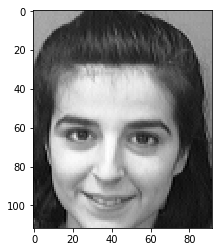

In [21]:
# In the train process, we still want to train with a really image in rectangular shape, 
# so we need to reshape 1-D array to 2-D array.

data_train_reshape = data_train.reshape(-1, height, width, 1)
data_test_reshape = data_test.reshape(-1, height, width, 1)

print("Now we see what the data of first image looks like after reshape")
print(data_train_reshape[0,:,:])
plt.imshow(data_train[7,:].reshape(height, width), cmap='gray')
plt.show()

In [10]:
# Now we define some tuning parameters that will be used in the model
epochs = 8

# Smaller the kernel, the less reduction, the more comsumption of computation source
kernel_1 = 2
kernel_2 = 3
kernel_3 = 4

# Larger the filter, the more feature can capture from the pic, the more comsumption of computation source
filter_1 = 8
filter_2 = 16
filter_3 = 32
learning_rate = 0.00002
rmsprop_v = optimizers.RMSprop(lr=learning_rate)
adam_v = optimizers.Adam(lr=learning_rate)

In [29]:
# Now we build the model by adding multiple layers
model = Sequential()  # the following layers are built in a sequential order
model.add(Conv2D(filter_1, kernel_size=(kernel_1, kernel_1), strides=(1, 1), activation='relu', input_shape=(height, width, 1))) 
# every model.add adds a CNN layer
model.add(AvgPool2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(filter_2, (kernel_2, kernel_2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filter_3, (kernel_3, kernel_3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10000, activation='sigmoid'))  # use dense means fully connected layer. sigmoid means it is logistic regression!
model.add(BatchNormalization())  # how to choose how many neurons in FCL?
model.add(Dense(5000, activation='sigmoid'))
model.add(Dense(500,  activation='sigmoid'))
model.add(Dense(40,   activation='softmax'))  
# the last layer is output layer. for task A, the total number of classes is 40.

In [24]:
# Now we compile (or say combine) the model and show the summary
model.compile(loss='categorical_crossentropy', optimizer=rmsprop_v, metrics=['accuracy'])
print("this is model summary")
model_summary = model.summary()
print("this is model summary end \n\n")

this is model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 111, 91, 8)        40        
_________________________________________________________________
average_pooling2d_2 (Average (None, 110, 90, 8)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 88, 16)       1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 44, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 51, 41, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 20, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)            

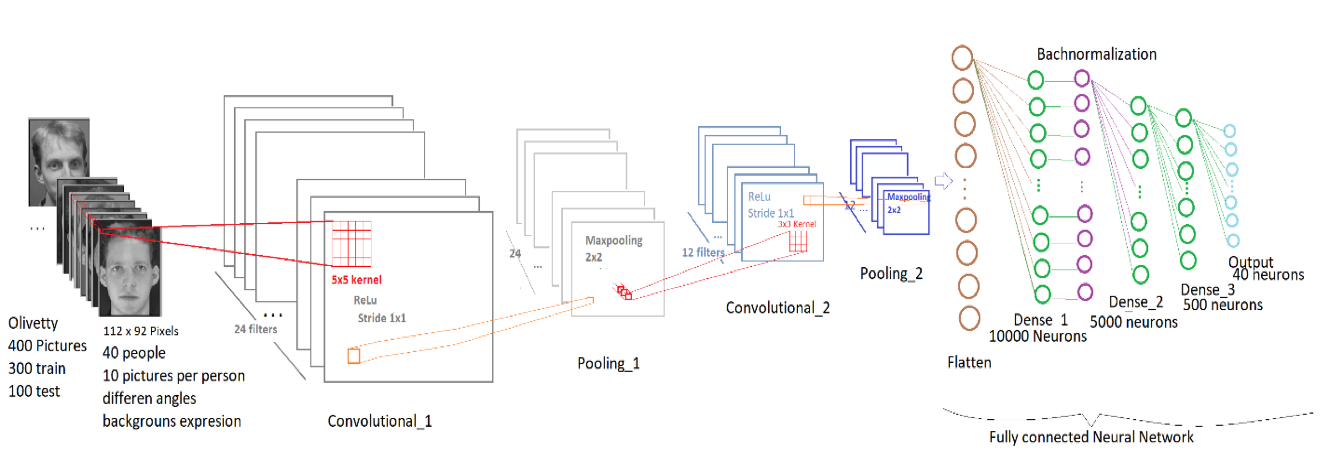

In [13]:
# Now Let's train the model using model.fit (the gradient descent is included in)
print("Now Start Train")
task = model.fit(data_train_reshape, label_train, epochs=epochs, batch_size=50)
#
# Now Let's test (evaluate) the model's performance
print("Now Start Test")
x_val_performance = model.evaluate(data_test_reshape, label_test)
print("Test Result is")
print(x_val_performance)

Now Start Train
Epoch 1/8
300/300 [==============================] - 51s 171ms/step - loss: 3.6621 - acc: 0.0833
Epoch 2/8
300/300 [==============================] - 54s 178ms/step - loss: 3.2435 - acc: 0.3633
Epoch 3/8
300/300 [==============================] - 47s 157ms/step - loss: 2.9559 - acc: 0.5967
Epoch 4/8
300/300 [==============================] - 41s 136ms/step - loss: 2.7227 - acc: 0.7633
Epoch 5/8
300/300 [==============================] - 42s 140ms/step - loss: 2.5137 - acc: 0.8167
Epoch 6/8
300/300 [==============================] - 45s 151ms/step - loss: 2.2826 - acc: 0.9133
Epoch 7/8
300/300 [==============================] - 45s 150ms/step - loss: 2.0949 - acc: 0.9367
Epoch 8/8
300/300 [==============================] - 42s 139ms/step - loss: 1.9064 - acc: 0.9467
Now Start Test
100/100 [==============================] - 2s 22ms/step
Test Result is
[2.9528631401062011, 0.69999999999999996]


# Smaller the kernel, the less reduction, the more comsumption of computation source
# Larger the filter, the more feature can capture from the pic, the more comsumption of computation source

# Loss is a summation of the errors made for each example in training or validation sets. Loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, one would expect the reduction of loss after each, or several, iteration(s).

# The accuracy of a model is usually determined after the model parameters are learned and fixed and no learning is taking place. Then the test samples are fed to the model and the number of mistakes (zero-one loss) the model makes are recorded, after comparison to the true targets. Then the percentage of misclassification is calculated. 
# For example, if the number of test samples is 1000 and model classifies 952 of those correctly, then the model's accuracy is 95.2%.

# Learning rate is the rate to approach the local minimum during gradient decent. 